In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import dython.nominal as dy
import warnings

warnings.filterwarnings('ignore')

**Prepare data for use**

Pull WR fantasy data from scraped CSV file

In [3]:
fantasy00to22 = pd.read_csv('Data/fantasy00to22.csv', usecols=["DKPt", "Name", "PFR_ID", "Position", "Season"])
fantasy00to22.rename(columns = {'DKPt': 'PPR_Fantasy_Points', "PFR_ID": 'pfr_id'}, inplace=True)
fantasy00to22 = fantasy00to22[fantasy00to22['Position'] == 'WR']
fantasy00to22.head()

PPR_Fantasy_Points        Name    pfr_id Position  Season
78                12.9  Randy Moss  MossRa00       WR    2000
79                21.6  Randy Moss  MossRa00       WR    2000
80                 4.0  Randy Moss  MossRa00       WR    2000
81                44.7  Randy Moss  MossRa00       WR    2000
82                25.8  Randy Moss  MossRa00       WR    2000

Use average of median and average to be metric of player's season

$$
    FanScore^{season} = \frac{FanPoints^{season}_{med} + FanPoints^{season}_{mean}}{2}
$$

In [4]:
fantasySeasonData00to22 = fantasy00to22.groupby(["Name", "pfr_id", "Position", "Season"], as_index=False)["PPR_Fantasy_Points"].mean()
fantasySeasonData00to22.rename(columns = {'PPR_Fantasy_Points': 'Avg_PPR_Fantasy_Points'}, inplace=True)
fantasySeasonData00to22['Med_PPR_Fantasy_Points'] = fantasy00to22.groupby(["Name", "pfr_id", "Position", "Season"], as_index=False)["PPR_Fantasy_Points"].median()["PPR_Fantasy_Points"]
fantasySeasonData00to22["MedAvg_PPR_Fantasy_Points"] = (fantasySeasonData00to22["Avg_PPR_Fantasy_Points"] + fantasySeasonData00to22["Med_PPR_Fantasy_Points"]) / 2
fantasySeasonData00to22.head()

Name    pfr_id Position  Season  Avg_PPR_Fantasy_Points  \
0  A.J. Brown  BrowAJ00       WR    2019               14.506250   
1  A.J. Brown  BrowAJ00       WR    2020               18.607143   
2  A.J. Brown  BrowAJ00       WR    2021               14.607692   
3  A.J. Brown  BrowAJ00       WR    2022               18.623529   
4  A.J. Green  GreeA.00       WR    2011               15.333333   

   Med_PPR_Fantasy_Points  MedAvg_PPR_Fantasy_Points  
0                   12.15                  13.328125  
1                   18.70                  18.653571  
2                    9.80                  12.203846  
3                   17.00                  17.811765  
4                   16.10                  15.716667

I am making the conclusion here that a successful fantasy career is one that has 5 good years (This obviously depends on the position). 

Take top 5 seasons and average them

In [5]:
fantasySeasonData00to22Top5 = fantasySeasonData00to22.groupby(["Name", "pfr_id", "Position"], as_index=False)['MedAvg_PPR_Fantasy_Points'].apply(lambda grp: grp.nlargest(5).mean())
fantasySeasonData00to22Top5.head()

Name    pfr_id Position  MedAvg_PPR_Fantasy_Points
0       A.J. Brown  BrowAJ00       WR                  15.499327
1       A.J. Green  GreeA.00       WR                  19.505631
2     A.J. Jenkins  JenkA.00       WR                   3.346667
3  Aaron Burbridge  BurbAa00       WR                   3.180000
4     Aaron Dobson  DobsAa00       WR                   4.953283

Pull scraped rookie WR data from CSV

In [7]:
rookies00to22 = pd.read_csv('Data/collegeWR_stats.csv', usecols=['Year', 'School', 'Rec', 'Rec_Yds', 'Rec_TD', 'pfr_id', 'Position', 'Name'])
rookies00to22.head()

Year School  Rec  Rec_Yds  Rec_TD         pfr_id Position         Name
0  2000.0  Tulsa    5      107     1.0  corey-brown-1       WR  Corey Brown
1  2000.0  Tulsa    9       98     1.0  corey-brown-1       WR  Corey Brown
2  2000.0  Tulsa    2       11     0.0  corey-brown-1       WR  Corey Brown
3  2000.0  Tulsa    4       29     1.0  corey-brown-1       WR  Corey Brown
4  2000.0  Tulsa    5       65     0.0  corey-brown-1       WR  Corey Brown

Merge fantasy data with rookie data

In [11]:
fullData00to22 = rookies00to22.merge(fantasySeasonData00to22Top5, on="pfr_id")
fullData00to22 = fullData00to22.drop(columns="Position")
fullData00to22.columns

Index(['season', 'draft_year', 'draft_team', 'draft_round', 'draft_ovr',
       'pfr_id', 'cfb_id', 'player_name', 'pos', 'school', 'ht', 'wt', 'forty',
       'bench', 'vertical', 'broad_jump', 'cone', 'shuttle', 'Name',
       'MedAvg_PPR_Fantasy_Points'],
      dtype='object')

See how draft/combine data is correlated for WR

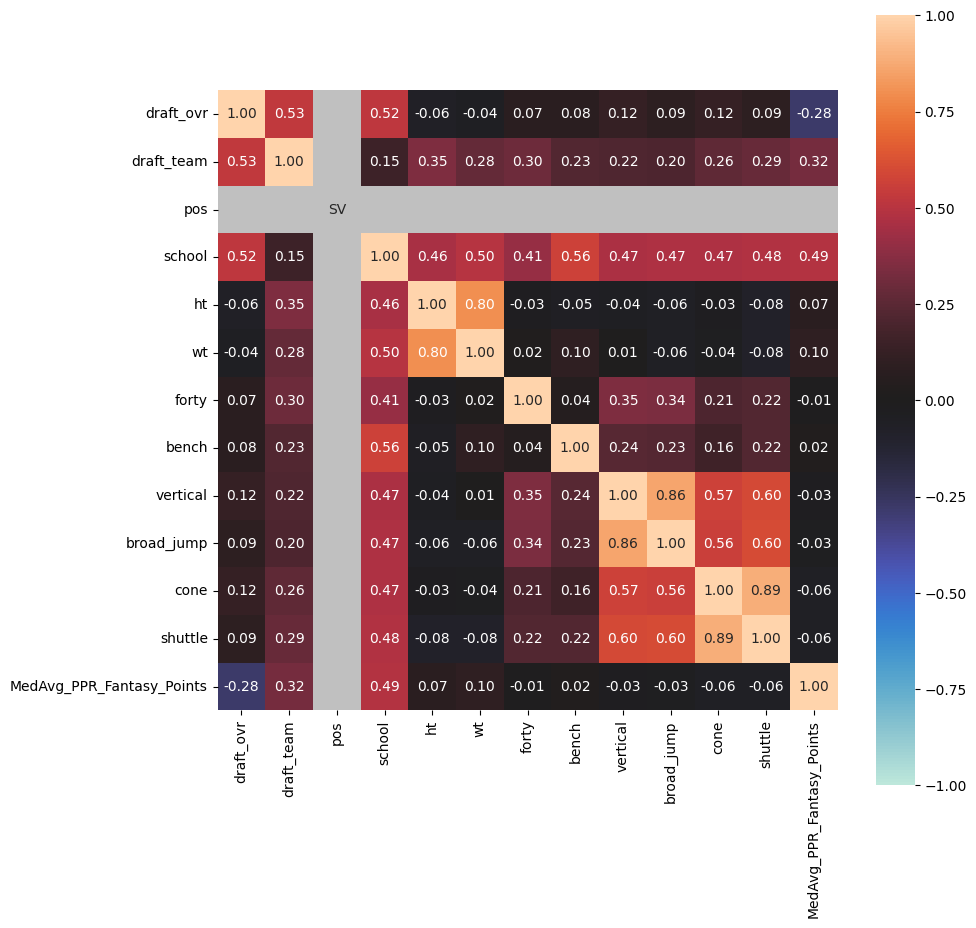

In [20]:
WRDat = fullData00to22[['draft_ovr', 'draft_team', 'pos', 'school', 'ht', 'wt', 'forty', 'bench', 'vertical', 'broad_jump', 'cone', 'shuttle', 'MedAvg_PPR_Fantasy_Points']]
WRDat = WRDat[WRDat['pos'] == 'WR']
complete_correlation = dy.associations(WRDat, filename= 'complete_correlation.png', figsize=(10,10))
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

See how draft/combine data is correlated for RB

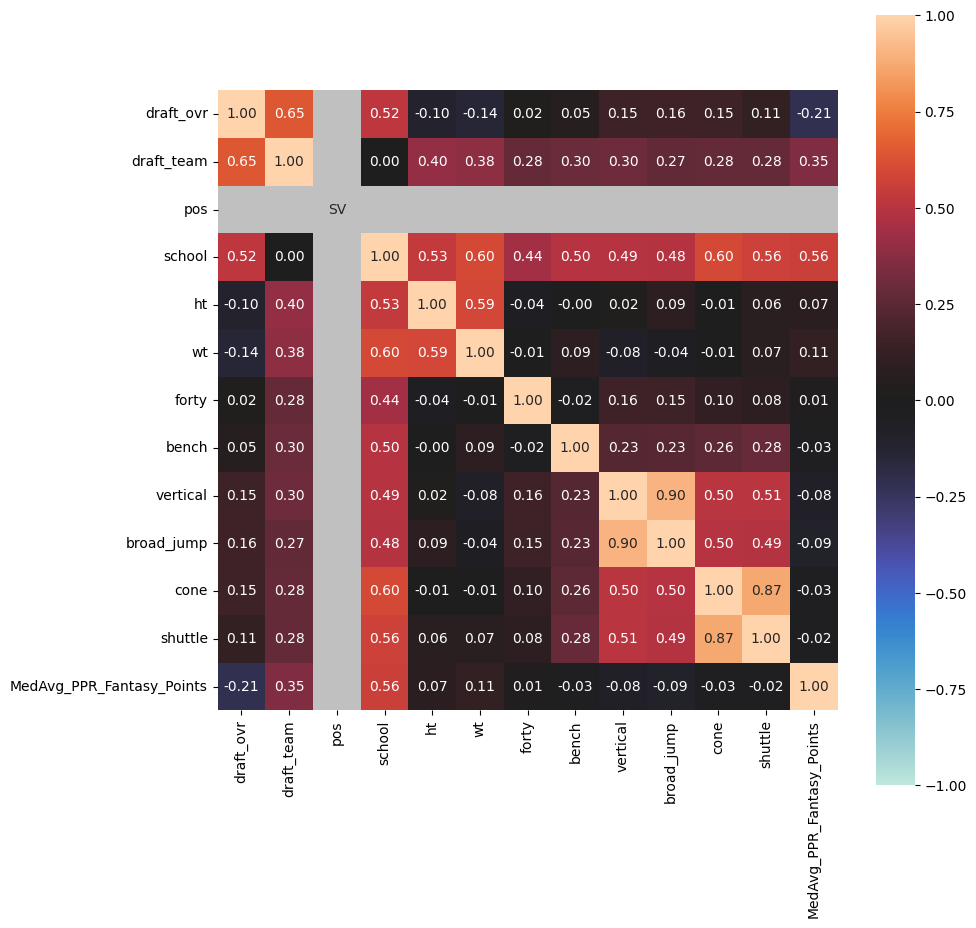

In [21]:
RBDat = fullData00to22[['draft_ovr', 'draft_team', 'pos', 'school', 'ht', 'wt', 'forty', 'bench', 'vertical', 'broad_jump', 'cone', 'shuttle', 'MedAvg_PPR_Fantasy_Points']]
RBDat = RBDat[RBDat['pos'] == 'RB']
complete_correlation = dy.associations(RBDat, filename= 'complete_correlation.png', figsize=(10,10))
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

See how draft/combine data is correlated for QB

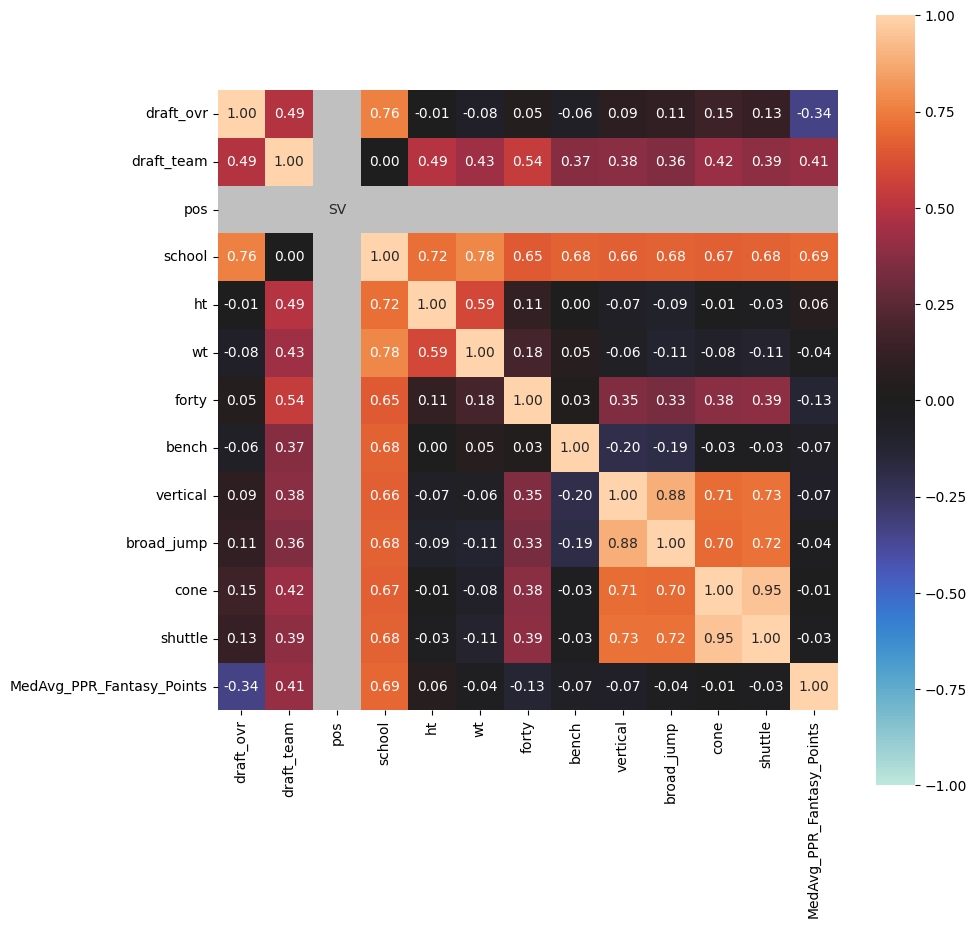

In [22]:
QBDat = fullData00to22[['draft_ovr', 'draft_team', 'pos', 'school', 'ht', 'wt', 'forty', 'bench', 'vertical', 'broad_jump', 'cone', 'shuttle', 'MedAvg_PPR_Fantasy_Points']]
QBDat = QBDat[QBDat['pos'] == 'QB']
complete_correlation = dy.associations(QBDat, filename= 'complete_correlation.png', figsize=(10,10))
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

See how draft/combine data is correlated for TE

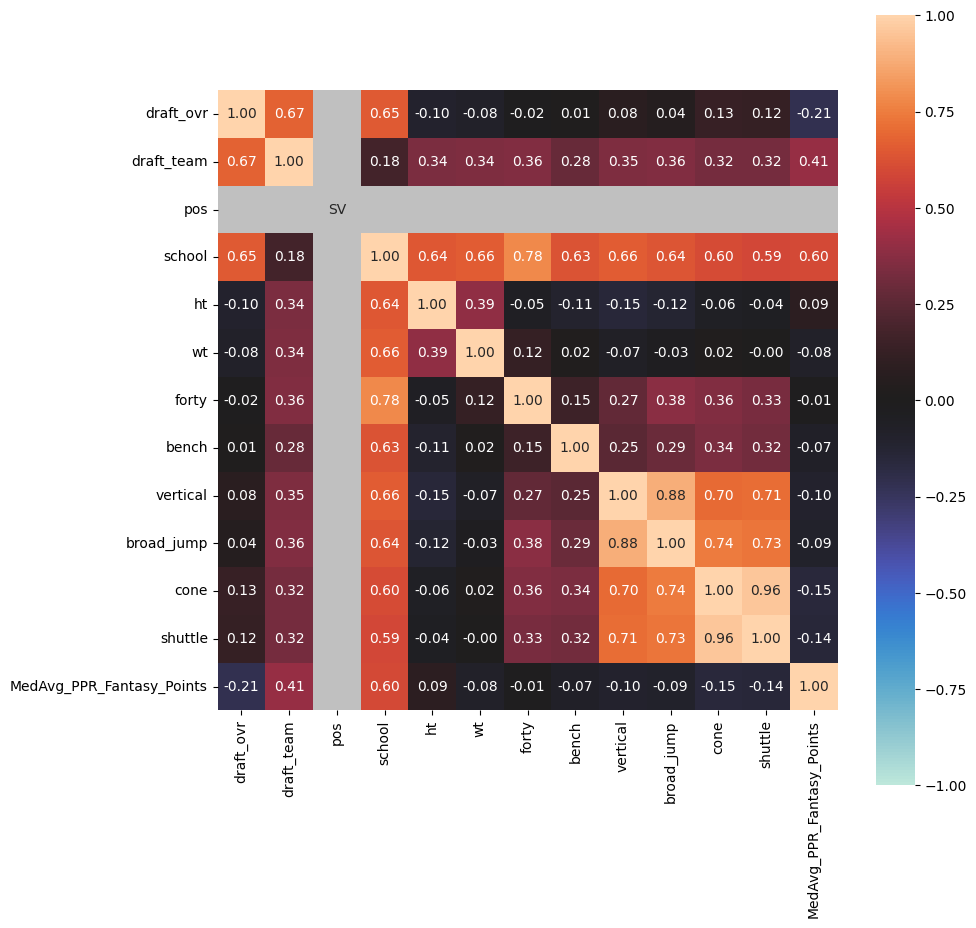

In [23]:
TEDat = fullData00to22[['draft_ovr', 'draft_team', 'pos', 'school', 'ht', 'wt', 'forty', 'bench', 'vertical', 'broad_jump', 'cone', 'shuttle', 'MedAvg_PPR_Fantasy_Points']]
TEDat = TEDat[TEDat['pos'] == 'TE']
complete_correlation = dy.associations(TEDat, filename= 'complete_correlation.png', figsize=(10,10))
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

Get WR Data

In [27]:
collegeWRStats = pd.read_csv('Data/collegeWR_stats.csv')
collegeWRStats.rename(columns = {'pfr_id': 'cfb_id'}, inplace=True)
collegeWRStats.head()

Unnamed: 0    Year School  Rec  Rec_Yds  Rec_Avg  Rec_TD  Rush_Att  \
0           0  2000.0  Tulsa    5      107     21.4     1.0       4.0   
1           1  2000.0  Tulsa    9       98     10.9     1.0       1.0   
2           2  2000.0  Tulsa    2       11      5.5     0.0       0.0   
3           3  2000.0  Tulsa    4       29      7.3     1.0       3.0   
4           4  2000.0  Tulsa    5       65     13.0     0.0       0.0   

   Rush_Yds  Rush_Avg  Rush_TD         cfb_id Position         Name  
0      67.0      16.8      0.0  corey-brown-1       WR  Corey Brown  
1      20.0      20.0      0.0  corey-brown-1       WR  Corey Brown  
2       0.0       NaN      0.0  corey-brown-1       WR  Corey Brown  
3      60.0      20.0      0.0  corey-brown-1       WR  Corey Brown  
4       0.0       NaN      0.0  corey-brown-1       WR  Corey Brown

Combine WR Draft/Combine data with college stats

In [28]:
fullWRData00to22 = fullData00to22[fullData00to22["pos"] == "WR"]
fullWRData00to22 = fullData00to22.merge(collegeWRStats, on='cfb_id')
fullWRData00to22.columns

Index(['season', 'draft_year', 'draft_team', 'draft_round', 'draft_ovr',
       'pfr_id', 'cfb_id', 'player_name', 'pos', 'school', 'ht', 'wt', 'forty',
       'bench', 'vertical', 'broad_jump', 'cone', 'shuttle', 'Name_x',
       'MedAvg_PPR_Fantasy_Points', 'Unnamed: 0', 'Year', 'School', 'Rec',
       'Rec_Yds', 'Rec_Avg', 'Rec_TD', 'Rush_Att', 'Rush_Yds', 'Rush_Avg',
       'Rush_TD', 'Position', 'Name_y'],
      dtype='object')

See correlations with new data

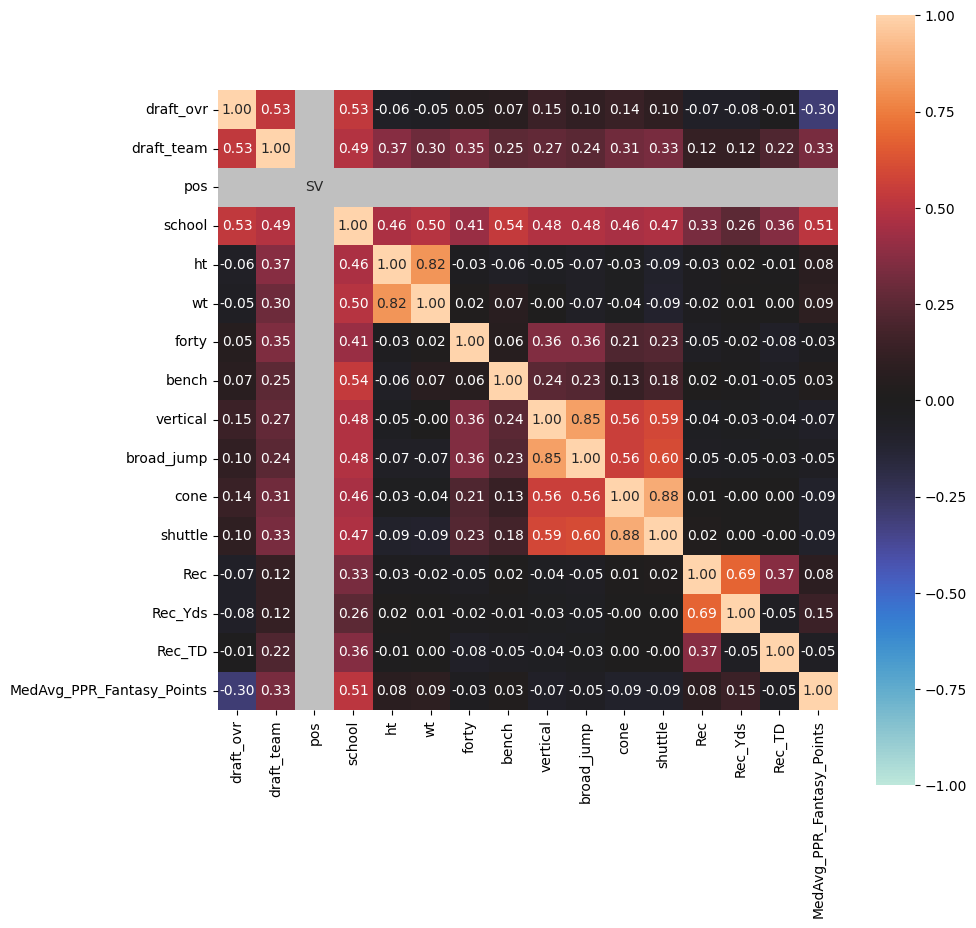

In [29]:
WRDat = fullWRData00to22[['draft_ovr', 'draft_team', 'pos', 'school', 'ht', 'wt', 'forty', 'bench', 'vertical', 'broad_jump', 'cone', 'shuttle', 'Rec', 'Rec_Yds', 'Rec_TD', 'MedAvg_PPR_Fantasy_Points']]
WRDat = WRDat[WRDat['pos'] == 'WR']
complete_correlation = dy.associations(WRDat, filename= 'complete_correlation.png', figsize=(10,10))
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)